# COHORT ANALYSIS

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from datetime import datetime
from operator import attrgetter

## 1. Load Dataset

In [89]:
df = pd.read_csv('session_5_cohort_analysis.csv', dtype={'CustomerID':str}, parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.2+ MB


## 2. Data Preprocessing 

Untuk membuat data yang tepat untuk membuat visualisai cohort analysis, 
kita harus mengubah dataset awal menjadi dataframe baru yang terdiri dari 4 kolom:

1. Cohort Date:
    Tanggal/waktu aktivitas pertama dari seorang user (Tanggal transaksi pertama, Tanggal login pertama, dll.)

2. Current Activity Date: 
    Waktu saat user mengulang aktivitasnya (Tanggal transaksi ke-2, tanggal transaksi ke-3, dst.)

3. Total Distinct Subject: 
    Total dari unique user berdasarkan Cohort Date dan Current Activity Date (Total user baru, Total customer baru, dll.)
    
4. Period Distance: 
    Jarak waktu antara Cohort Date dan Current Activity Date (nilainya paling kecil 0)

In [91]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom


In [92]:
# df[df['CustomerID']=='13313']

In [93]:
# Step 1
# Buat kolom baru bernama "cohort_month"

df['cohort_month'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,2011-04


In [94]:
# df[df['CustomerID']=='13313']

In [95]:
# Step 2
# Buat kolom baru bernama "current_order_month"

df['current_order_month'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,current_order_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,2011-04,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,2011-04,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,2011-04,2011-04


In [96]:
# df[df['CustomerID']=='13313']

In [97]:
# Step 3
# Mencari jumlah unique user berdasarkan 'cohort_month' dan 'current_order_month'

# df.groupby(['cohort_month', 'current_order_month']).nunique()['CustomerID'].reset_index()

In [98]:
df_cohort = df.groupby(['cohort_month', 'current_order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index()
df_cohort.head()

,cohort_month,current_order_month,n_customers
0,2011-01,2011-01,967
1,2011-01,2011-02,320
2,2011-01,2011-03,368
3,2011-01,2011-04,338
4,2011-01,2011-05,381


In [99]:
# Step 4
# Membuat kolom baru bernama "period_number" yang berisi selisih bulan antara cohort_month dan current_order_month

df_cohort['period_number'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']).apply(attrgetter('n'))
df_cohort

,cohort_month,current_order_month,n_customers,period_number
0,2011-01,2011-01,967,0
1,2011-01,2011-02,320,1
2,2011-01,2011-03,368,2
3,2011-01,2011-04,338,3
4,2011-01,2011-05,381,4
...,...,...,...,...
73,2011-10,2011-11,53,1
74,2011-10,2011-12,10,2
75,2011-11,2011-11,244,0
76,2011-11,2011-12,11,1


In [100]:
# Step 5 
# Membuat pivot table dengan: 
    # index = cohort_month
    # columns = period_number
    # values = n_customer

cohort_retention_pivot = df_cohort.pivot_table(index='cohort_month', columns='period_number', values='n_customers')
cohort_retention_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,967.0,320.0,368.0,338.0,381.0,397.0,396.0,341.0,417.0,413.0,481.0,191.0
2011-02,542.0,137.0,142.0,166.0,166.0,173.0,162.0,169.0,172.0,202.0,59.0,NaN
2011-03,500.0,109.0,121.0,123.0,129.0,113.0,120.0,137.0,144.0,35.0,NaN,NaN
2011-04,383.0,86.0,84.0,82.0,75.0,76.0,106.0,98.0,24.0,NaN,NaN,NaN
2011-05,309.0,61.0,64.0,54.0,77.0,58.0,88.0,23.0,NaN,NaN,NaN,NaN
2011-06,314.0,57.0,55.0,64.0,61.0,87.0,21.0,NaN,NaN,NaN,NaN,NaN
2011-07,252.0,50.0,47.0,53.0,66.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,186.0,32.0,44.0,52.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,255.0,40.0,55.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Menampilkan cohort retention dalam satuan persen

cohort_size = cohort_retention_pivot.iloc[ : , 0]
cohort_size

cohort_month
2011-01    967.0
2011-02    542.0
2011-03    500.0
2011-04    383.0
2011-05    309.0
2011-06    314.0
2011-07    252.0
2011-08    186.0
2011-09    255.0
2011-10    266.0
2011-11    244.0
2011-12     26.0
Freq: M, Name: 0, dtype: float64

In [102]:
# retention dalam persentase

retention_in_percentage = cohort_retention_pivot.div(cohort_size, axis=0) * 100
retention_in_percentage

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,100.0,33.092037,38.055843,34.953464,39.400207,41.054809,40.951396,35.263702,43.123061,42.709411,49.741468,19.75181
2011-02,100.0,25.276753,26.199262,30.627306,30.627306,31.918819,29.889299,31.180812,31.734317,37.269373,10.885609,NaN
2011-03,100.0,21.800000,24.200000,24.600000,25.800000,22.600000,24.000000,27.400000,28.800000,7.000000,NaN,NaN
2011-04,100.0,22.454308,21.932115,21.409922,19.582245,19.843342,27.676240,25.587467,6.266319,NaN,NaN,NaN
2011-05,100.0,19.741100,20.711974,17.475728,24.919094,18.770227,28.478964,7.443366,NaN,NaN,NaN,NaN
2011-06,100.0,18.152866,17.515924,20.382166,19.426752,27.707006,6.687898,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,19.841270,18.650794,21.031746,26.190476,3.968254,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,17.204301,23.655914,27.956989,5.913978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,100.0,15.686275,21.568627,2.745098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Visualization: Heatmap

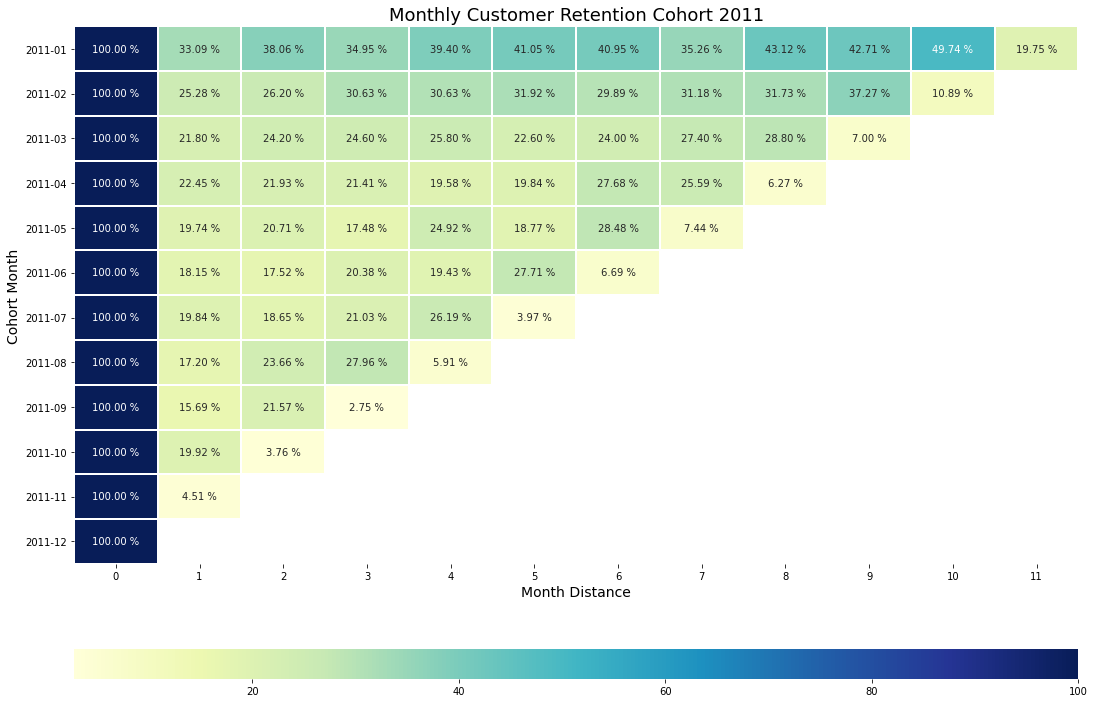

In [103]:
# mengatur ukuran grrid/axes
grid_kws = {"height_ratios":(0.9, 0.05), "hspace": 0.3}

# membuat figure dan axes
fig, (ax, cbar_ax) = plt.subplots(nrows=2, figsize=(18,12), gridspec_kw=grid_kws)

# axes baris atas diisi dengan heatmap
ax = sns.heatmap(
                data=retention_in_percentage,
                ax=ax,                                      # meletakkan heatmap
                cbar_ax=cbar_ax,                            # meletakkan color bar    
                annot=True,                                 # memberi label nilai    
                fmt= '.2f',                                 # format penulisan untuk annot        
                cbar_kws={'orientation':'horizontal'},      # mengubah orientasi color bar
                cmap='YlGnBu',                              # mengganti tema warna
                linewidths=1                                # memberi garis diantara setap cell dalam heatmap
                )

for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_title("Monthly Customer Retention Cohort 2011", fontsize=18)
ax.set_xlabel("Month Distance", fontsize=14)
ax.set_ylabel("Cohort Month", fontsize=14)
ax.set_yticklabels(df_cohort['cohort_month'].unique() , rotation=0)

plt.show()

In [104]:
# df_cohort['cohort_month'].unique()

## 4. Data Visualization: Line Plot

In [105]:
# buat data frame baru

df_lineplot = df_cohort.copy()
df_lineplot.head()

,cohort_month,current_order_month,n_customers,period_number
0,2011-01,2011-01,967,0
1,2011-01,2011-02,320,1
2,2011-01,2011-03,368,2
3,2011-01,2011-04,338,3
4,2011-01,2011-05,381,4


In [106]:
# Ubah kolom tanggal menjadi string

df_lineplot['cohort_month'] = df_lineplot['cohort_month'].astype(str)
df_lineplot['current_order_month'] = df_lineplot['current_order_month'].astype(str)

df_lineplot.dtypes

cohort_month           object
current_order_month    object
n_customers             int64
period_number           int64
dtype: object

In [107]:
# mengubah n_customer ke dalam persen

df_plot_state = df_lineplot.groupby('cohort_month').agg({'n_customers': 'max'})
df_plot_state

,n_customers
cohort_month,
2011-01,967
2011-02,542
2011-03,500
2011-04,383
2011-05,309
2011-06,314
2011-07,252
2011-08,186
2011-09,255


In [108]:
# membagi setiap baris di df_lineplot dengan n_customers dari df_plot_state
df_plot = df_lineplot.set_index('cohort_month').div(df_plot_state, level='cohort_month', axis=0) * 100

# cuma pakai 2 kolom 'cohort_month' dan 'n_customers'
df_plot = df_plot.reset_index()[['cohort_month', 'n_customers']].rename(columns={'n_customers':'percentage_customers'})

df_plot.head()

,cohort_month,percentage_customers
0,2011-01,100.000000
1,2011-01,33.092037
2,2011-01,38.055843
3,2011-01,34.953464
4,2011-01,39.400207


In [109]:
# tambah kolom baru
df_plot['current_order_month'] = df_lineplot['current_order_month']
df_plot['period_number'] = df_lineplot['period_number']

df_plot = df_plot[['cohort_month', 'current_order_month', 'percentage_customers', 'period_number']]

df_plot.head()

,cohort_month,current_order_month,percentage_customers,period_number
0,2011-01,2011-01,100.000000,0
1,2011-01,2011-02,33.092037,1
2,2011-01,2011-03,38.055843,2
3,2011-01,2011-04,34.953464,3
4,2011-01,2011-05,39.400207,4


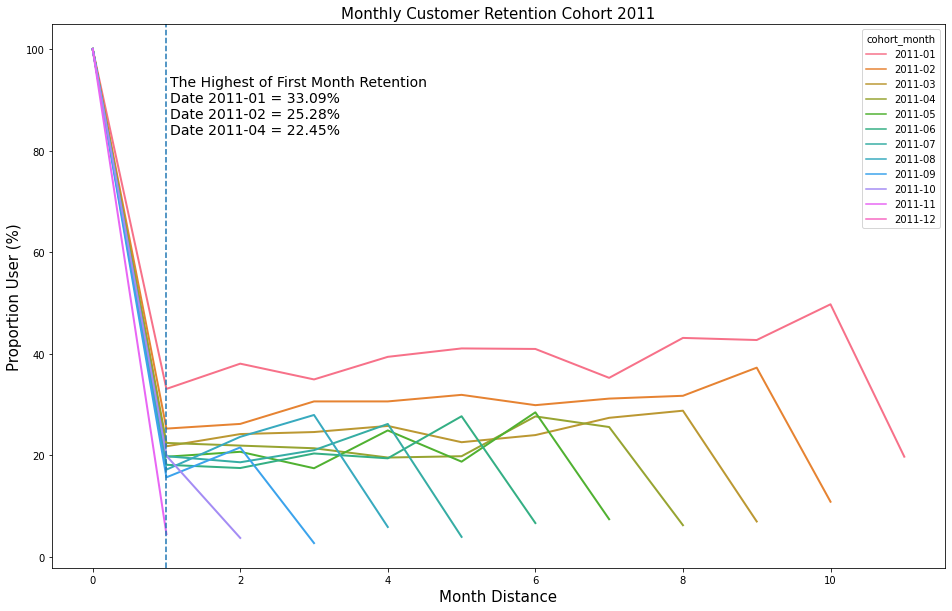

In [110]:
plt.figure(figsize=(16,10))

sns.lineplot(
    data=df_plot,
    x='period_number',
    y='percentage_customers',
    hue='cohort_month',
    palette='husl',
    linewidth=2
)


plt.title("Monthly Customer Retention Cohort 2011",fontsize=15)
plt.ylabel('Proportion User (%)',fontsize=15)    
plt.xlabel('Month Distance',fontsize=15)

# Menambahkan keterangan berupa Top 3 Cohort dengan persentase retention paling tinggi di bulan pertama
top_3 = df_plot[df_plot['period_number']==1].sort_values('percentage_customers', ascending=False).iloc[:3]
top_3_name = top_3['cohort_month'].tolist()
top_3_value = [round(x,2) for x in top_3['percentage_customers'].tolist()]

test_plot = f'''
The Highest of First Month Retention
Date {top_3_name[0]} = {top_3_value[0]}%
Date {top_3_name[1]} = {top_3_value[1]}%
Date {top_3_name[2]} = {top_3_value[2]}%
'''

plt.text(1.05, 80, test_plot, fontsize=14)

# menambah garis vertikal
plt.axvline(x=1, linestyle='--')

plt.xlabel

plt.show()